## NFL Data Analysis

Motivation taken from the kernel [here](https://www.kaggle.com/carrie1/cowboys-td-plays-from-last-year).

### Load Data

In [1]:
import pandas as pd
df = pd.read_csv('./data/nfl.csv', low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362447 entries, 0 to 362446
Data columns (total 100 columns):
Date                           362447 non-null object
GameID                         362447 non-null int64
Drive                          362447 non-null int64
qtr                            362447 non-null int64
down                           308229 non-null float64
time                           362259 non-null object
TimeUnder                      362447 non-null int64
TimeSecs                       362259 non-null float64
PlayTimeDiff                   362073 non-null float64
SideofField                    361997 non-null object
yrdln                          361724 non-null float64
yrdline100                     361724 non-null float64
ydstogo                        362447 non-null int64
ydsnet                         362447 non-null int64
GoalToGo                       361724 non-null float64
FirstDown                      336850 non-null float64
posteam                

### Filter My Team

In [3]:
df.HomeTeam.unique()

array(['PIT', 'CLE', 'NO', 'TB', 'HOU', 'IND', 'CIN', 'CAR', 'BAL', 'ATL',
       'ARI', 'SEA', 'NYG', 'GB', 'NE', 'OAK', 'DET', 'WAS', 'TEN', 'PHI',
       'NYJ', 'KC', 'JAC', 'SF', 'BUF', 'SD', 'DEN', 'CHI', 'DAL', 'MIA',
       'MIN', 'STL', 'LA', 'JAX'], dtype=object)

In [21]:
# Get all Patriots games with touchdowns in 2016
PATS_KEY = 'NE'
pats = df[((df.HomeTeam == PATS_KEY) | (df.AwayTeam == PATS_KEY)) & 
          (df.Season == 2016) &
          (df.Touchdown == 1)]

In [35]:
# Make sure we have all 16 games
assert len(pats.groupby(by='Date')) == 16

### Filter My Offense

In [37]:
# Get plays where we are on offense
offense = pats[pats.DefensiveTeam != PATS_KEY]

# Get top 25 by yardage
long = offense.sort_values(by='Yards.Gained',ascending=False)[:25]

# Figure out the scorer
long['scorer'] = long.Rusher
long['scorer'].fillna(long.Receiver, inplace=True)

# Examine
long[['PlayType', 'down', 'Yards.Gained', 'Date', 'qtr', 'desc', 'scorer', 'Rusher', 'Receiver', 'Passer']].sort_values(by='Date')

,PlayType,down,Yards.Gained,Date,qtr,desc,scorer,Rusher,Receiver,Passer
319038,Pass,2.0,37,2016-09-11,1,(7:42) J.Garoppolo pass deep left to C.Hogan f...,C.Hogan,NaN,C.Hogan,J.Garoppolo
320514,Pass,3.0,20,2016-09-18,1,(6:27) (Shotgun) J.Garoppolo pass deep middle ...,M.Bennett,NaN,M.Bennett,J.Garoppolo
320534,Pass,3.0,10,2016-09-18,2,(13:14) (Shotgun) J.Garoppolo pass short middl...,D.Amendola,NaN,D.Amendola,J.Garoppolo
320500,Pass,2.0,12,2016-09-18,1,(11:02) (Shotgun) J.Garoppolo pass short middl...,D.Amendola,NaN,D.Amendola,J.Garoppolo
320605,Run,1.0,9,2016-09-18,3,(8:46) (Shotgun) L.Blount right tackle for 9 y...,L.Blount,L.Blount,NaN,NaN
322621,Run,2.0,41,2016-09-22,4,"(11:08) L.Blount left end for 41 yards, TOUCHD...",L.Blount,L.Blount,NaN,NaN
322517,Run,1.0,27,2016-09-22,1,"(2:01) J.Brissett right end for 27 yards, TOUC...",J.Brissett,J.Brissett,NaN,NaN
328364,Pass,1.0,37,2016-10-09,3,(12:28) (No Huddle) T.Brady pass deep right to...,M.Bennett,NaN,M.Bennett,T.Brady
332235,Pass,1.0,15,2016-10-16,2,(1:06) (Shotgun) T.Brady pass short right to J...,J.White,NaN,J.White,T.Brady
335390,Pass,3.0,19,2016-10-23,1,(3:03) (Shotgun) T.Brady pass short left to J....,J.White,NaN,J.White,T.Brady


### Plotting

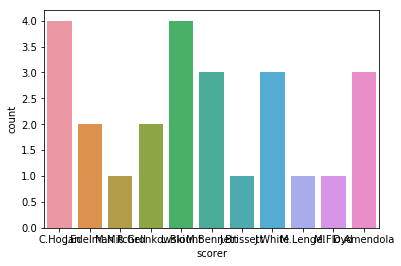

In [27]:
import seaborn as sns
%matplotlib inline
sns.countplot(x='scorer', data=long)

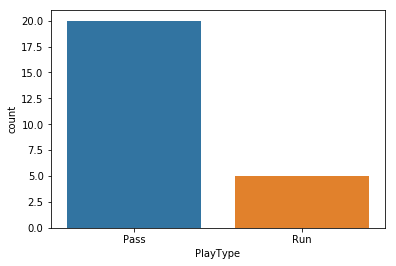

In [28]:
# Play type breakdown
sns.countplot(x=long.PlayType.name, data=long)

### Pass/Run Breakdown

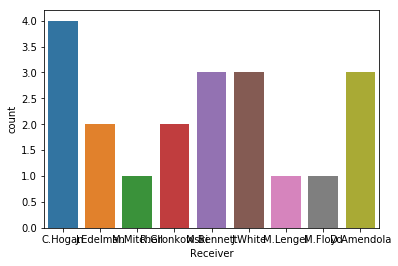

In [29]:
throw = long[long.PlayType == 'Pass']
sns.countplot(x=throw.Receiver.name, data=throw)

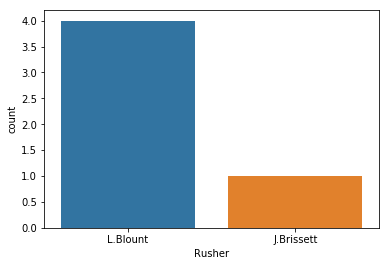

In [30]:
run = long[long.PlayType == 'Run']
sns.countplot(x=run.Rusher.name, data=run)

### Rushing Yards 

In [33]:
blount = offense[(offense.Rusher == 'L.Blount') | (offense.Receiver == 'L.Blount')]

# Get average yards
import numpy as np
np.mean(blount['Yards.Gained'])

7.2631578947368425

In [34]:
# Compare to rest of team
np.mean(offense['Yards.Gained'])

16.03846153846154